# Boxsize 3x3

## $R/L_T$ = 6.0

#### $N_s$ = 16, $N_\mu$ = 9, $N_{vpar}$ = 48

In [1]:
# Import modules
import sys, os, h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.transforms import Bbox

filepath = os.getcwd()
homepath = filepath.split('data')[0]
sys.path.insert(1, homepath + 'evaluation')

import zonalflow, gkw, derivative, plot

# Plot parameter
%matplotlib inline
plot.parameters(True, 22, (24,8), 300)

In [2]:
# File import and Create picture folder
data = filepath[filepath.find('data/')+len('data/'):filepath.rfind('/boxsize')]
path = filepath.split(data + '/')[1]

resolution = path.replace('/', '_')
rlt = data.split("rlt",1)[1]
filename = 'data.h5'
f = h5py.File(filename,"r+")

picpath = homepath+'pictures/'+data+'/'+path+'/'
## Create target Directory if don't exist
if not os.path.exists(picpath):
    os.makedirs(picpath)

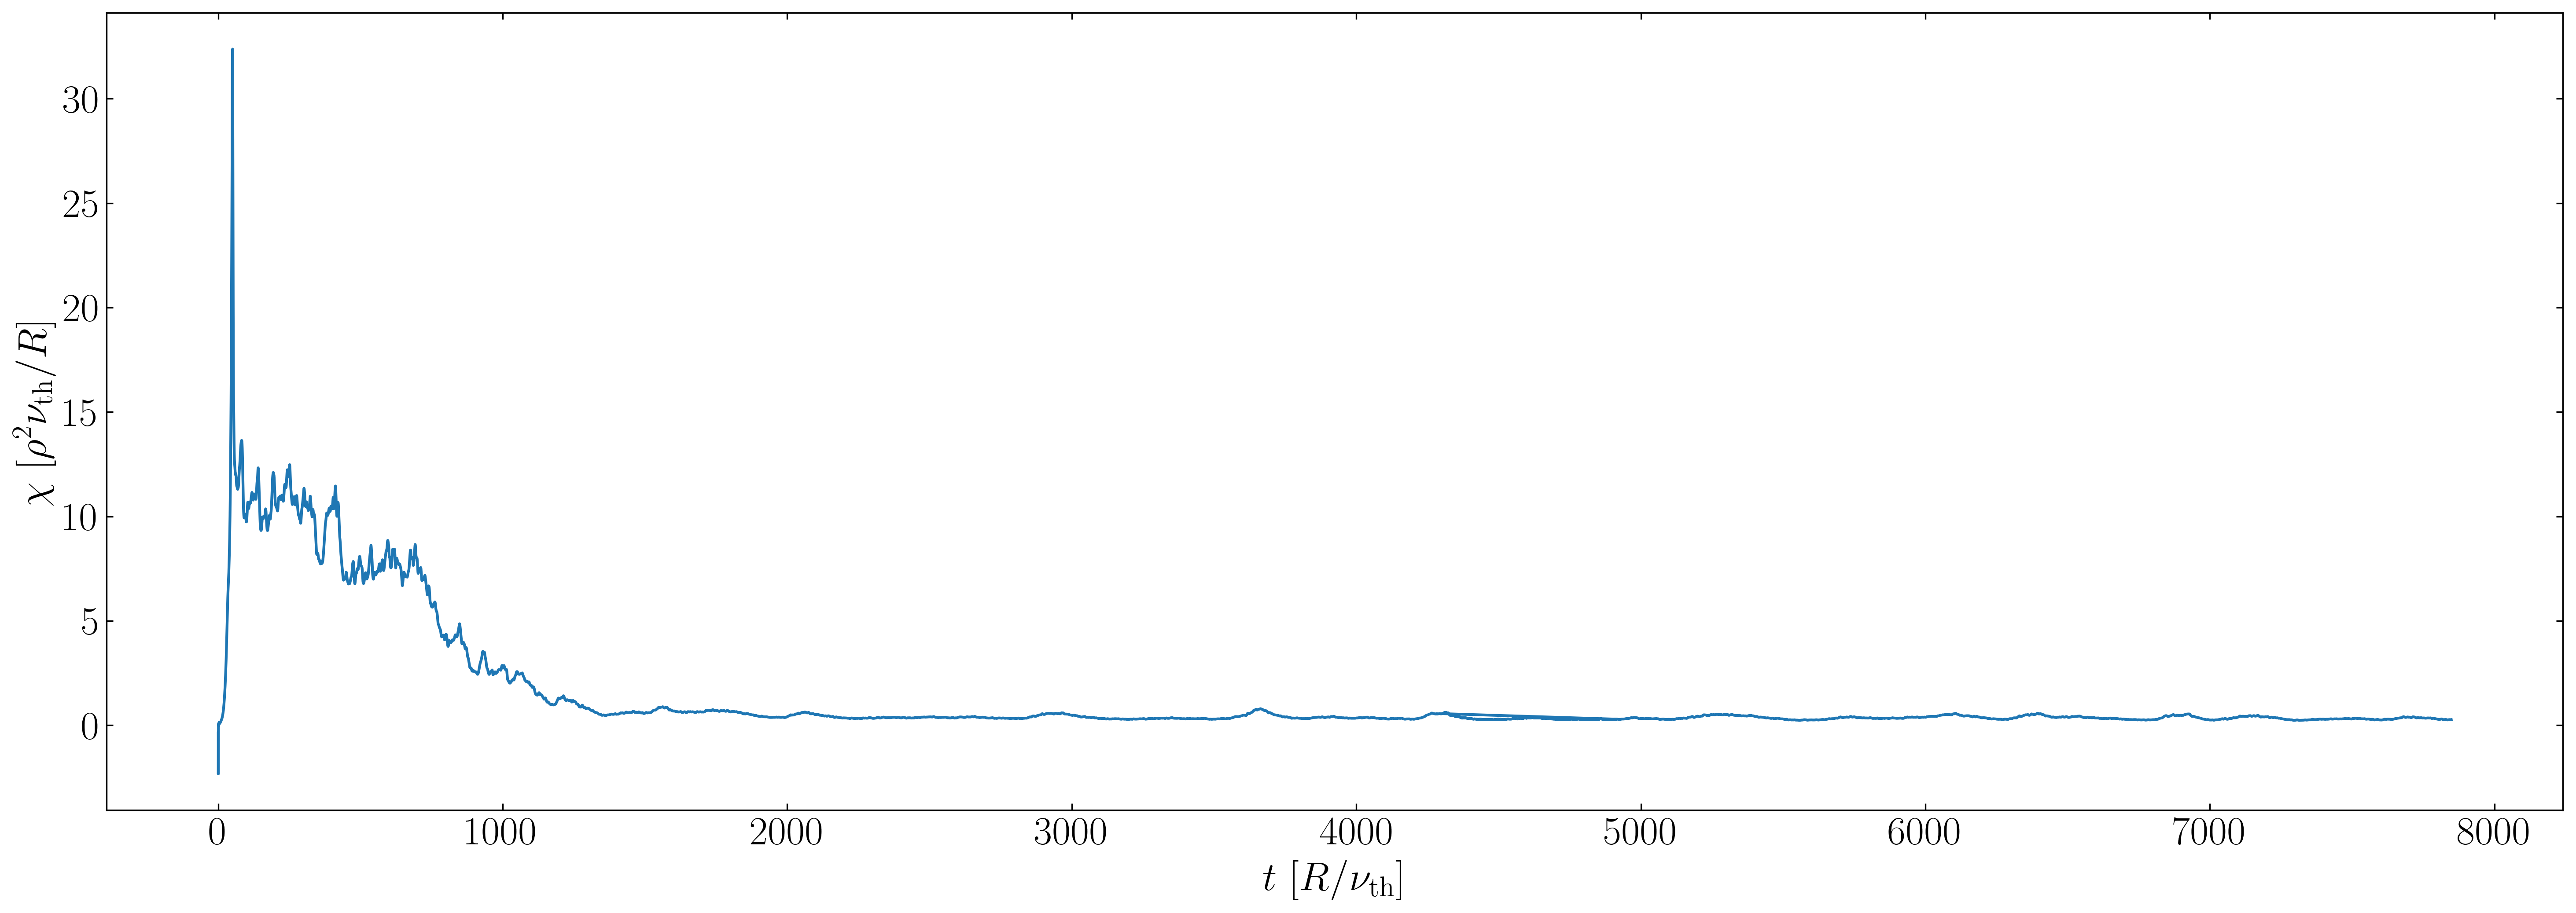

In [3]:
# Heat flux
eflux_data, time = zonalflow.get_eflux_time(f)

plot.eflux_time(time, eflux_data, (24,8))
plt.savefig(picpath+data+'_'+resolution+'_eflux.pdf', bbox_inches='tight')

In [4]:
# Finite Difference for shearing rate omega_ExB
wexb, rad_coord, rad_boxsize, ddphi, dx, zonal_pot = zonalflow.get_shearingrate_radialcoordinate_radialboxsize_ddphi_dx_zonalpot(f)

print('rad_boxsize :', rad_boxsize, '; stepsize :',dx)

rad_boxsize : 228.81146788521093 ; stepsize : 0.6101639143605625


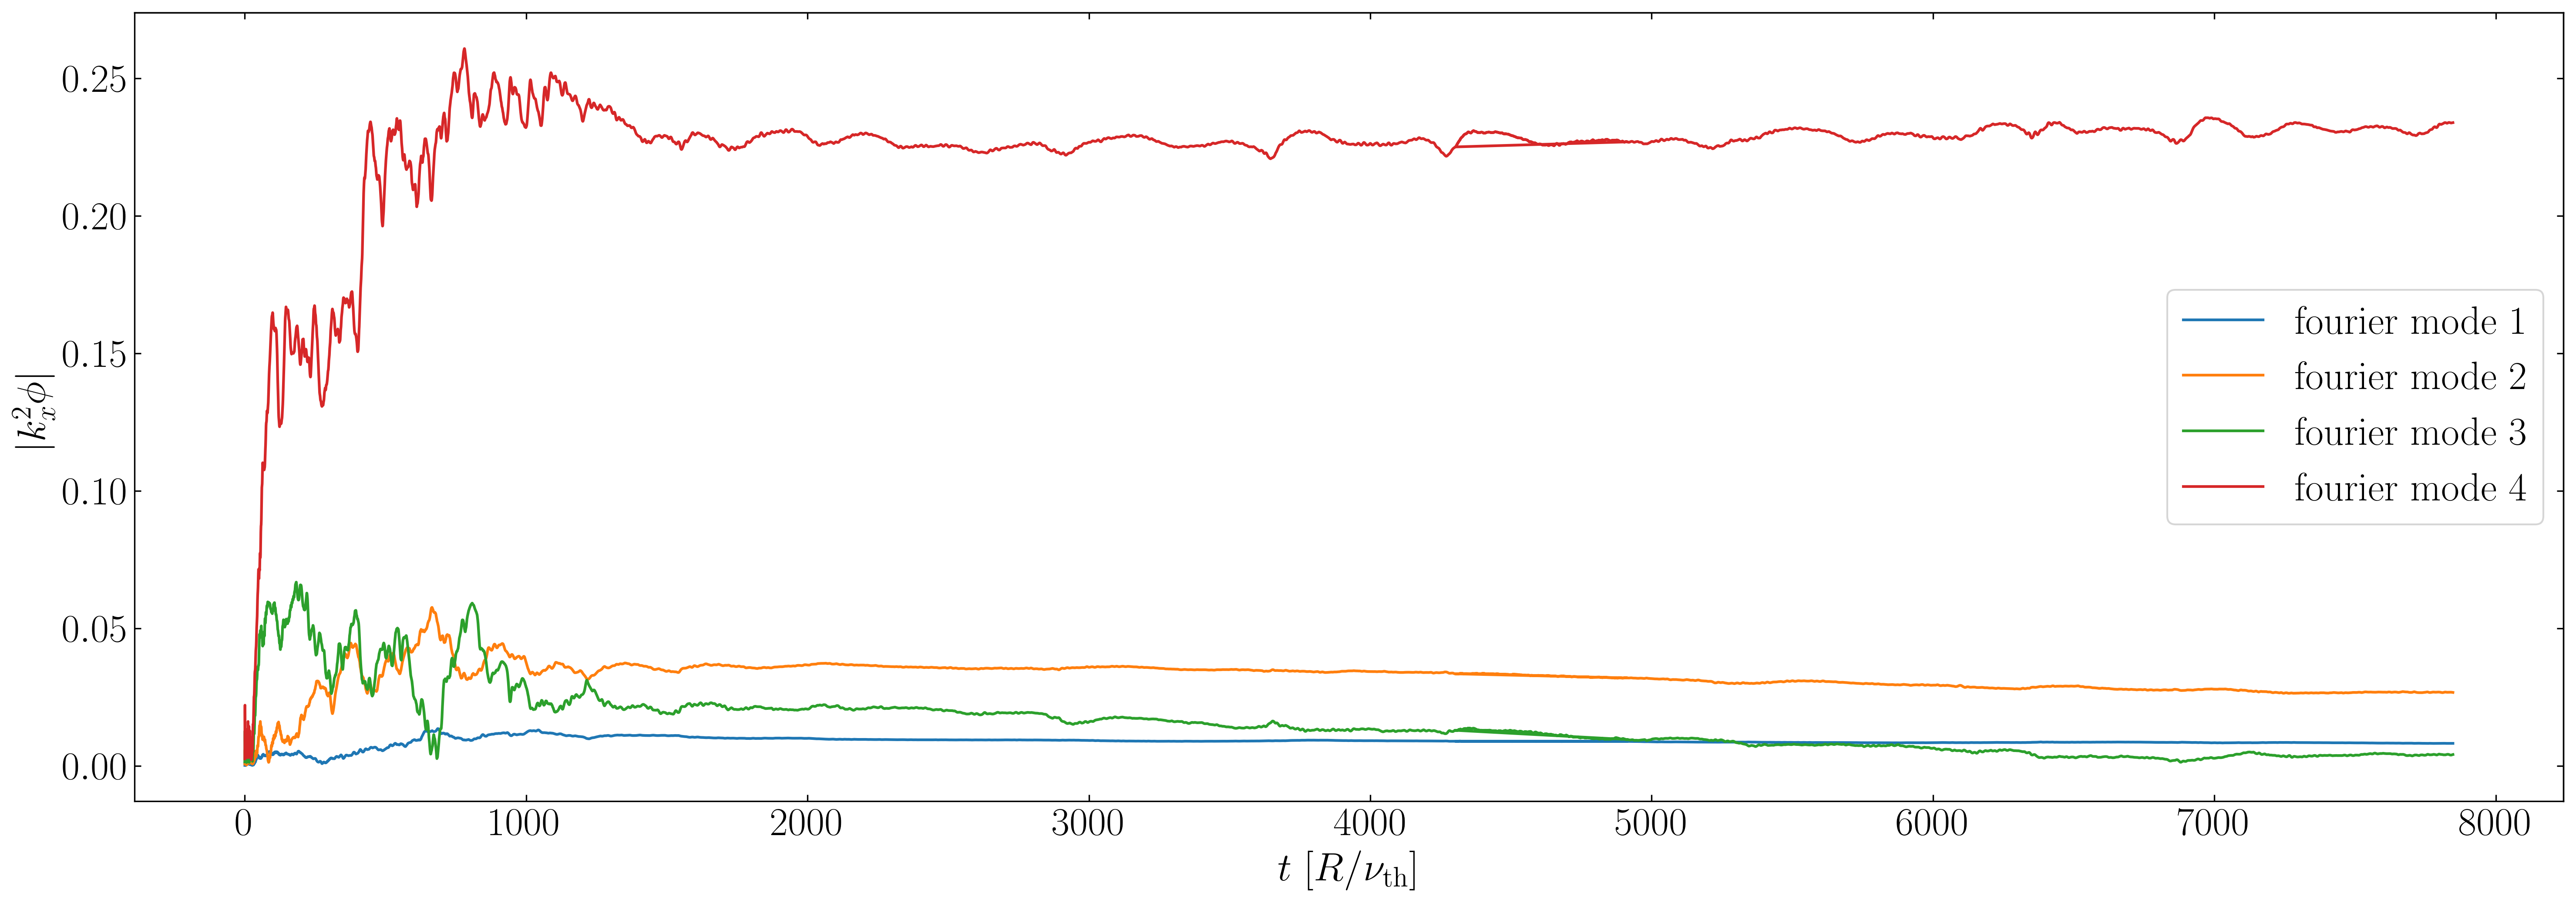

In [5]:
# Fourier plot of time domain

wexb_max = zonalflow.get_max_shearingrate(wexb, time, 4)

plot.max_shearingrate_time(time, wexb_max, [1,2,3,4], (24,8))
plt.savefig(picpath+data+'_'+resolution+'_wexb_max.pdf', bbox_inches='tight')

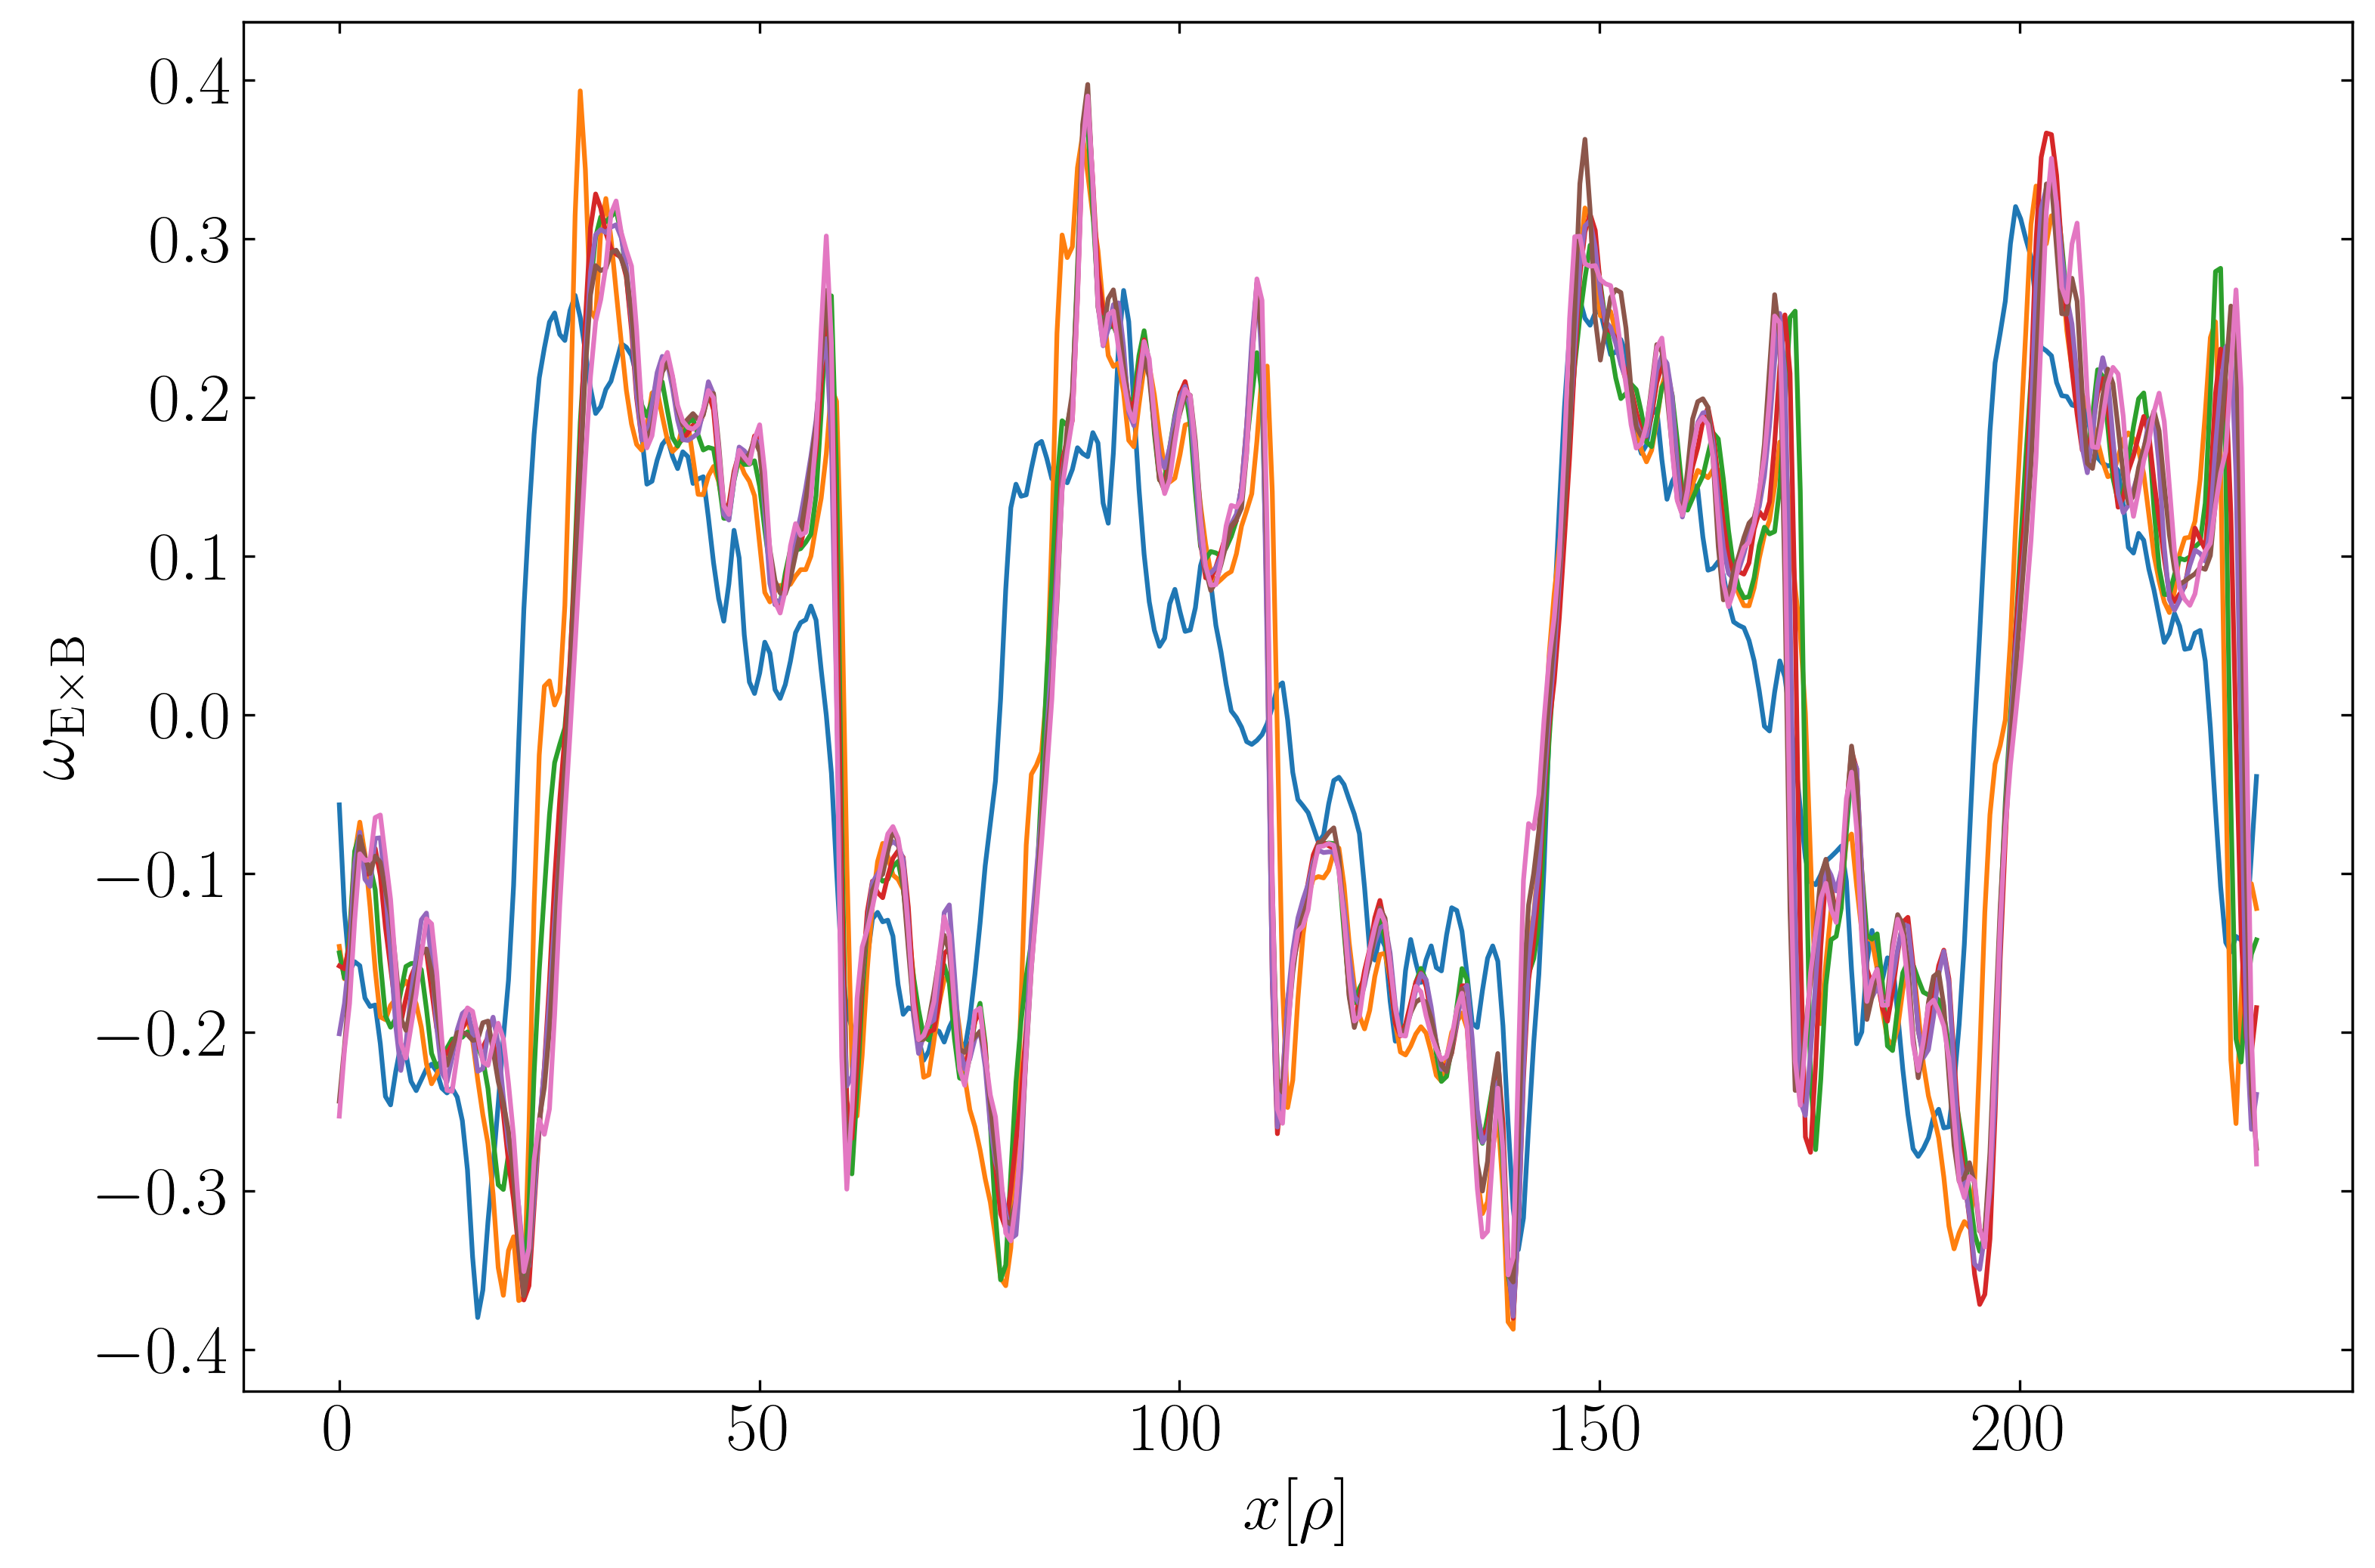

In [6]:
# Plot all shearing rate with mean overe intervall in 1000 steps
plot.all_shearingrate_radialcoordinate(rad_coord, wexb, (12,8), 2000)
plt.savefig(picpath+data+'_'+resolution+'_wexb_all.pdf', bbox_inches='tight')

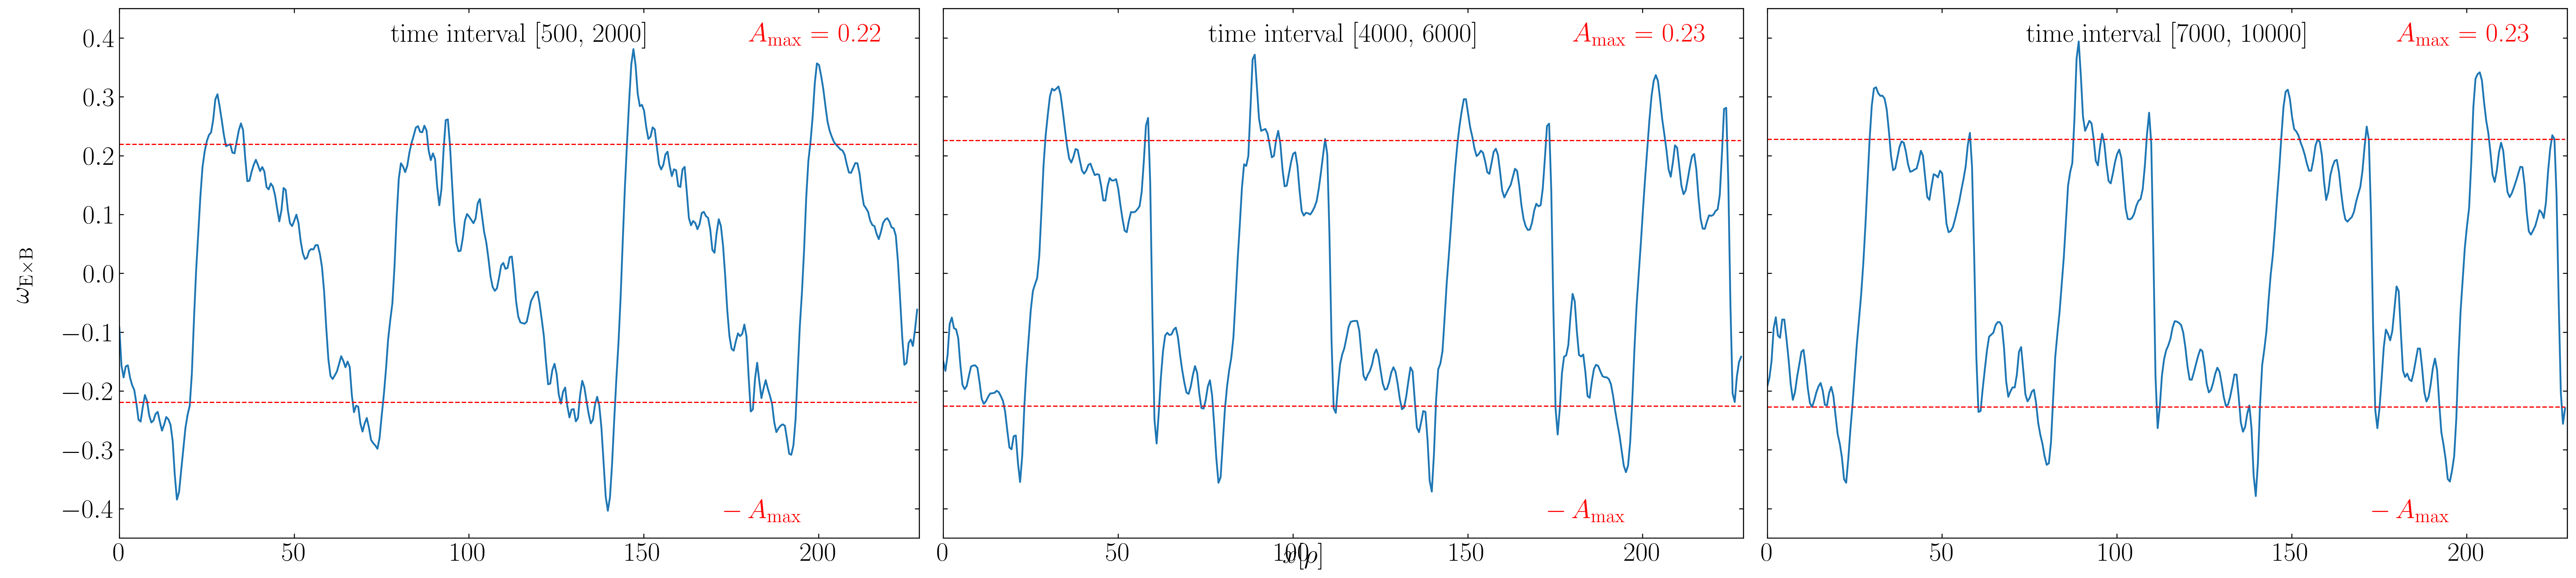

In [7]:
fig, ax, grid_y, grid_x, interval = plot.mean_shearingrate_radialcoordinate_subplots_grid(wexb, 3000, 500, True, True)

i = 0

for y in grid_y:
    for x in grid_x:
        start, end = interval[0][i], interval[1][i]
        
        # Shearing rate with mean over time
        wexb_rad_mean, wexb_rad_middle = zonalflow.get_mean_middle_shearingrate(start, end, wexb)
        # FT{shearing rate}
        wexb_rad_mean_amp, wexb_rad_mean_amp_max = zonalflow.get_fft_mean_max_shearingrate_amplitude(wexb_rad_mean)

        plot.mean_shearingrate_radialcoordinate_subplot(rad_coord, rad_boxsize, wexb_rad_mean, wexb_rad_middle, wexb_rad_mean_amp_max, 
                                                        ax, x, y, start, end)
        
        i += 1

fig.text(0.5, 0.09, r'$x[\rho]$', ha='center')
fig.text(0.09, 0.5, r'$\omega_{\mathrm{E \times B}}$', va='center', rotation='vertical')

plt.subplots_adjust(wspace=0.03, hspace=0.05)
plt.savefig(picpath+data+'_'+resolution+'_wexb_evolution.pdf', bbox_inches='tight')

In [8]:
# Close h5-File
f.close()